# LPPUFv1 LR Attack

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import pypuf.batch

In [2]:
results = pypuf.batch.FilesystemResultCollection('results/v1/lr')

In [3]:
data = pd.DataFrame(results.load_all())

# fix a bug where the p-value was included as the last axis
data['correlation'] = data.apply(lambda row: row['correlation'][:, :, 0] if len(row['correlation'].shape) == 3 else row['correlation'], axis=1)
# fix a bug where the p-value was included as the last axis
data['correlation_unrelated'] = data.apply(lambda row: row['correlation_unrelated'][:, :, 0] if not np.isnan(row['correlation_unrelated']).any() and len(row['correlation_unrelated'].shape) == 3 else row['correlation_unrelated'], axis=1)

# compute max correlation (by abs val)
data['correlation_max'] = data.apply(lambda row: np.max(np.abs(row['correlation'])), axis=1)
data['correlation_unrelated_max'] = data.apply(lambda row: np.max(np.abs(row['correlation_unrelated'])), axis=1)

# unpack accuracy
data['accuracy'] = data.apply(lambda row: row['accuracy'][0], axis=1)

In [4]:
data['LP-PUF Layer 3 Weights'] = data['correlation_max']
data['Unrelated XOR Arbiter PUF'] = data['correlation_unrelated_max']

melted_data = data[data.iloc[0].parameters + ['LP-PUF Layer 3 Weights', 'Unrelated XOR Arbiter PUF']].melt(
    id_vars=data.iloc[0].parameters,
    var_name='Correlation with',
    value_name='correlation',
    value_vars=['LP-PUF Layer 3 Weights', 'Unrelated XOR Arbiter PUF'],
)

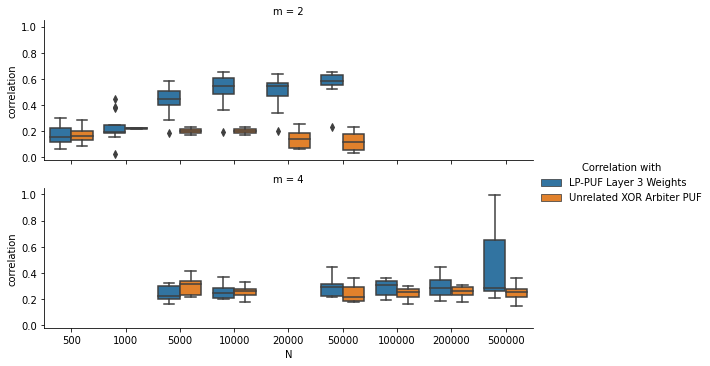

In [5]:
sns.catplot(
    x='N', 
    y='correlation', 
    row='m', 
    #col='noisiness_2', 
    hue='Correlation with', 
    data=melted_data[melted_data['m'].isin([2, 4])],
    kind='box',
    aspect=3/1,
    height=2.5,
)

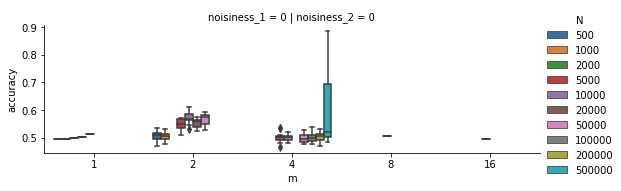

In [6]:
sns.catplot(
    x='m', 
    y='accuracy', 
    row='noisiness_1', 
    col='noisiness_2', 
    hue='N', 
    data=data,
    kind='box',
    aspect=3/1,
    height=2.5,
)